# Predict Gold Price in Indonesia using LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/Shizu-ka/bruvv/main/1979-2021.csv

--2023-12-03 18:38:47--  https://raw.githubusercontent.com/Shizu-ka/bruvv/main/1979-2021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71037 (69K) [text/plain]
Saving to: ‘1979-2021.csv’

1979-2021.csv       100%[===================>]  69.37K  --.-KB/s    in 0.03s   

2023-12-03 18:38:47 (2.49 MB/s) - ‘1979-2021.csv’ saved [71037/71037]



In [ ]:
df = pd.read_csv('1979-2021.csv')
df.head()

,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,31-01-1979,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,NaN,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,197.2,194.5
1,28-02-1979,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,NaN,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,219.6,209.4
2,30-03-1979,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,NaN,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,214.6,202.4
3,30-04-1979,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,NaN,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,221.1,206.9
4,31-05-1979,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,NaN,NaN,933.3,171656.1,1048.4,5560.8,NaN,NaN,133889.6,250.7,233.7


In [ ]:
df = df[['Date', 'Indonesia(IDR)']]
# 'Date' is the datetime column
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

<ipython-input-4-4961db19271b>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-4-4961db19271b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Indonesia(IDR)
Date,
1979-01-31,139739.3
1979-02-28,154683.1
1979-03-30,148844.2
1979-04-30,152453.6
1979-05-31,171656.1


# Normalize the Data and Train Test Split

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Create sequences for LSTM

In [ ]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 10  # You can adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
7/7 [==============================] - 12s 40ms/step - loss: 0.0199
Epoch 2/10
7/7 [==============================] - 0s 43ms/step - loss: 0.0073
Epoch 3/10
7/7 [==============================] - 0s 40ms/step - loss: 0.0019
Epoch 4/10
7/7 [==============================] - 0s 29ms/step - loss: 9.5086e-04
Epoch 5/10
7/7 [==============================] - 0s 28ms/step - loss: 6.9326e-04
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 4.3620e-04
Epoch 7/10
7/7 [==============================] - 0s 27ms/step - loss: 4.3896e-04
Epoch 8/10
7/7 [==============================] - 0s 28ms/step - loss: 2.8753e-04
Epoch 9/10
7/7 [==============================] - 0s 28ms/step - loss: 2.9877e-04
Epoch 10/10
7/7 [==============================] - 0s 24ms/step - loss: 2.7378e-04


3/3 [==============================] - 1s 8ms/step
Mean Squared Error: 2161954095569.7124


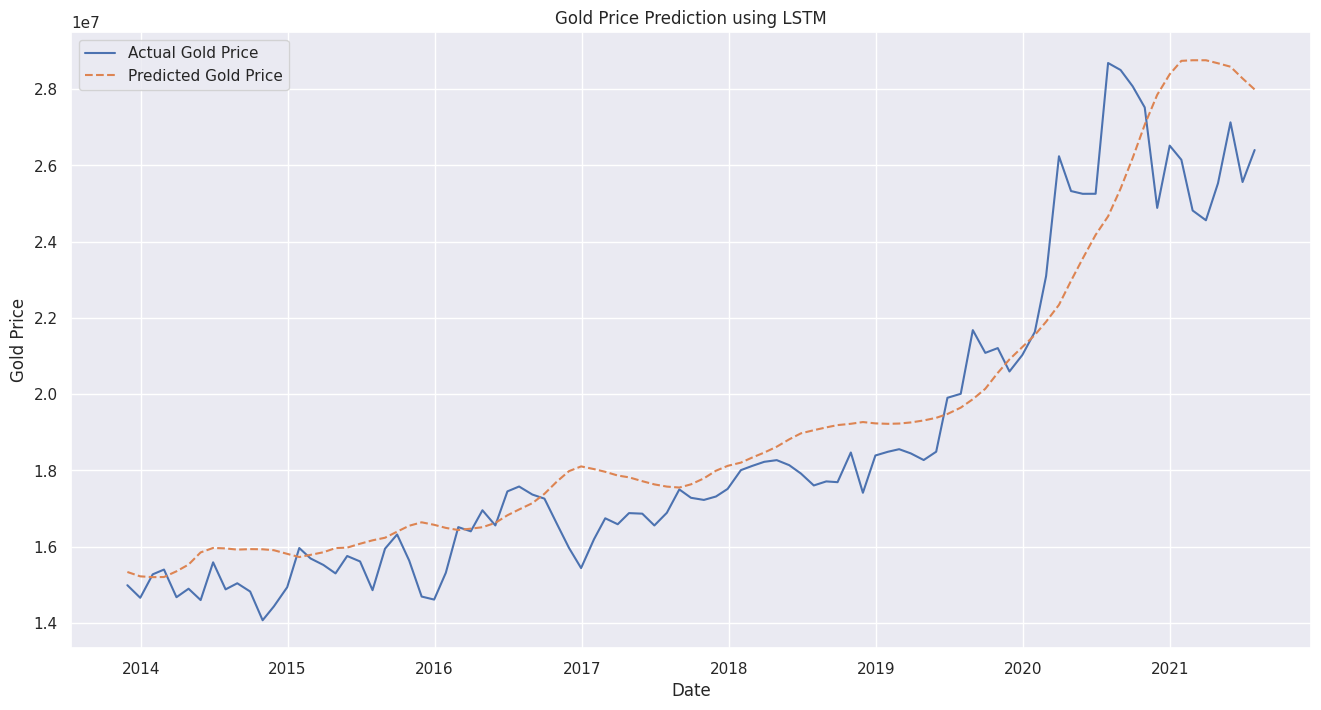

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Evaluate the model (you can use various metrics depending on your requirements)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]['Indonesia(IDR)'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the predictions
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]['Indonesia(IDR)'], label='Actual Gold Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Gold Price', linestyle='dashed')
plt.title('Gold Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

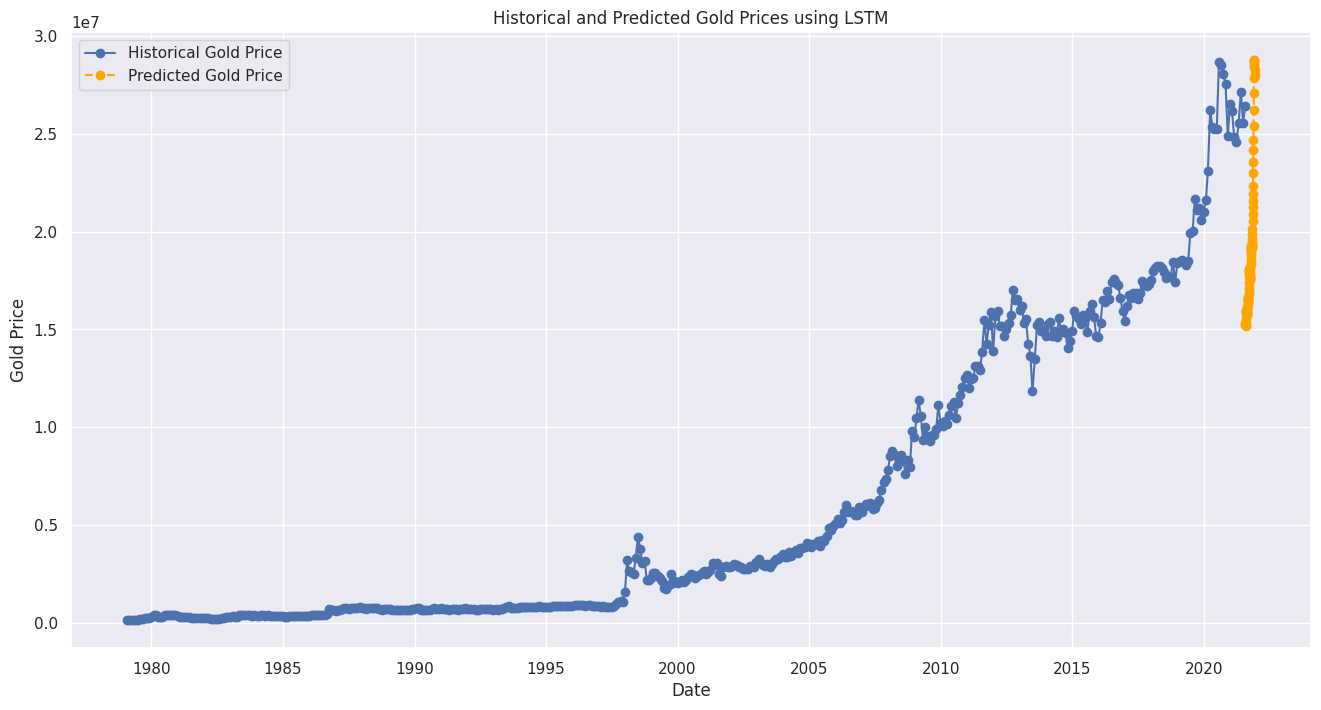

In [ ]:
# Update the column name used for Gold prices
Gold_price_column = 'Indonesia(IDR)'

# Plot the historical Gold prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[Gold_price_column], label='Historical Gold Price', marker='o', linestyle='-', color='b')

# Plot the predicted Gold prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Gold Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Gold Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Arima Model

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Indonesia(IDR)'])
p_value = result[1]
print(f'p-value: {p_value}')

p-value: 1.0


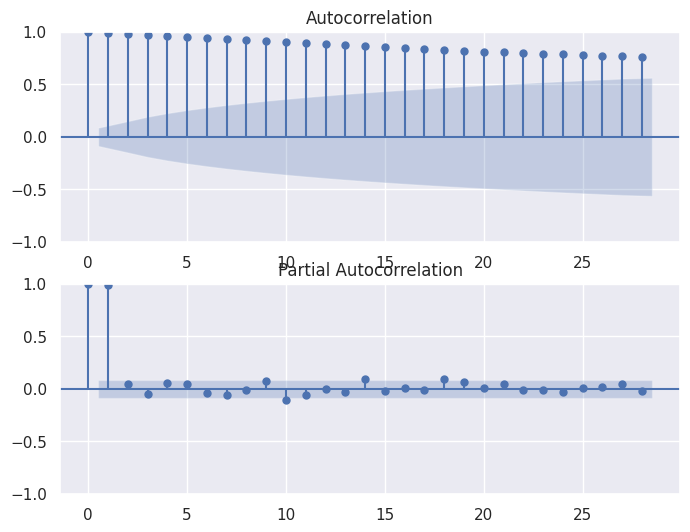

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(df, ax=ax1)
plot_pacf(df, ax=ax2)
plt.show()

###Make dataset stationary

In [ ]:
# Perform differencing
df_diff = df.diff().dropna()

print(df_diff)

            Indonesia(IDR)
Date                      
1979-02-28         14943.8
1979-03-30         -5838.9
1979-04-30          3609.4
1979-05-31         19202.5
1979-06-29         -4801.7
...                    ...
2021-03-31       -255683.4
2021-04-30        971200.8
2021-05-31       1597582.5
2021-06-30      -1565611.7
2021-07-30        839235.8

[510 rows x 1 columns]


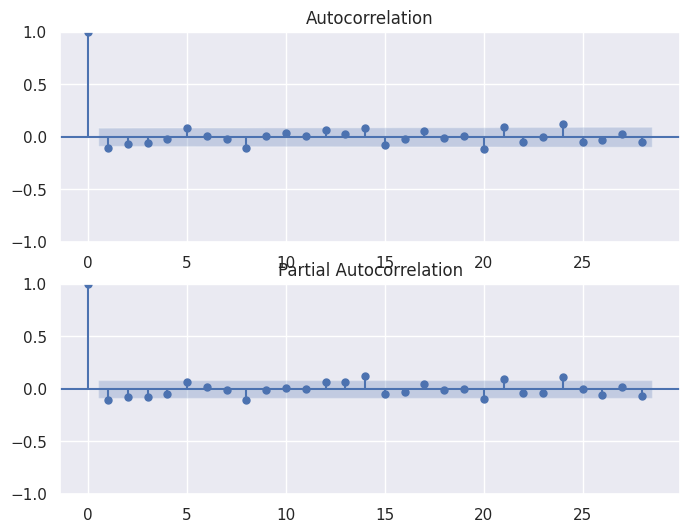

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(df_diff, ax=ax1)
plot_pacf(df_diff, ax=ax2)
plt.show()

### Algorithm for searching p and q using grid search

In [ ]:
# p_values = [0, 1, 2, 3, 4, 5]
# q_values = [0, 1, 2, 3, 4, 5]

# scores = []  # Initialize scores list

# for p in p_values:
#     for q in q_values:
#         try:
#             model = ARIMA(df_diff, order=(p, 0, q))
#             model_fit = model.fit()
#             score = model_fit.aic
#             scores.append((p, q, score))
#         except:
#             continue

# # Find the combination with the lowest score
# best_p, best_q, best_score = min(scores, key=lambda x: x[2])
# print(f"Best p: {best_p}, Best q: {best_q}, Best score: {best_score}")

###Check if stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
check_stationarity(df_diff)

ADF Statistic: -5.048249
p-value: 0.000018
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Stationary


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


###This is for auto searching for p and q with max 25 lag

In [ ]:
from pmdarima import auto_arima

model = auto_arima(df_diff['Indonesia(IDR)'], start_p=0, max_p=25, start_q=0, max_q=25, seasonal=False)

In [ ]:
y = df_diff['Indonesia(IDR)'].values

###There are 3 methods of training you can try, regular, ridge and cmle

In [ ]:
# model_fit = model.fit(y)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)

#Ridge regularization
model_fit = model.fit(y, solver=ridge_model)

In [ ]:
# from scipy import optimize
# #cmle
# solver = optimize.fmin_l_bfgs_b

# model_fit = model.fit(y, solver=solver)

1910380649895.0671


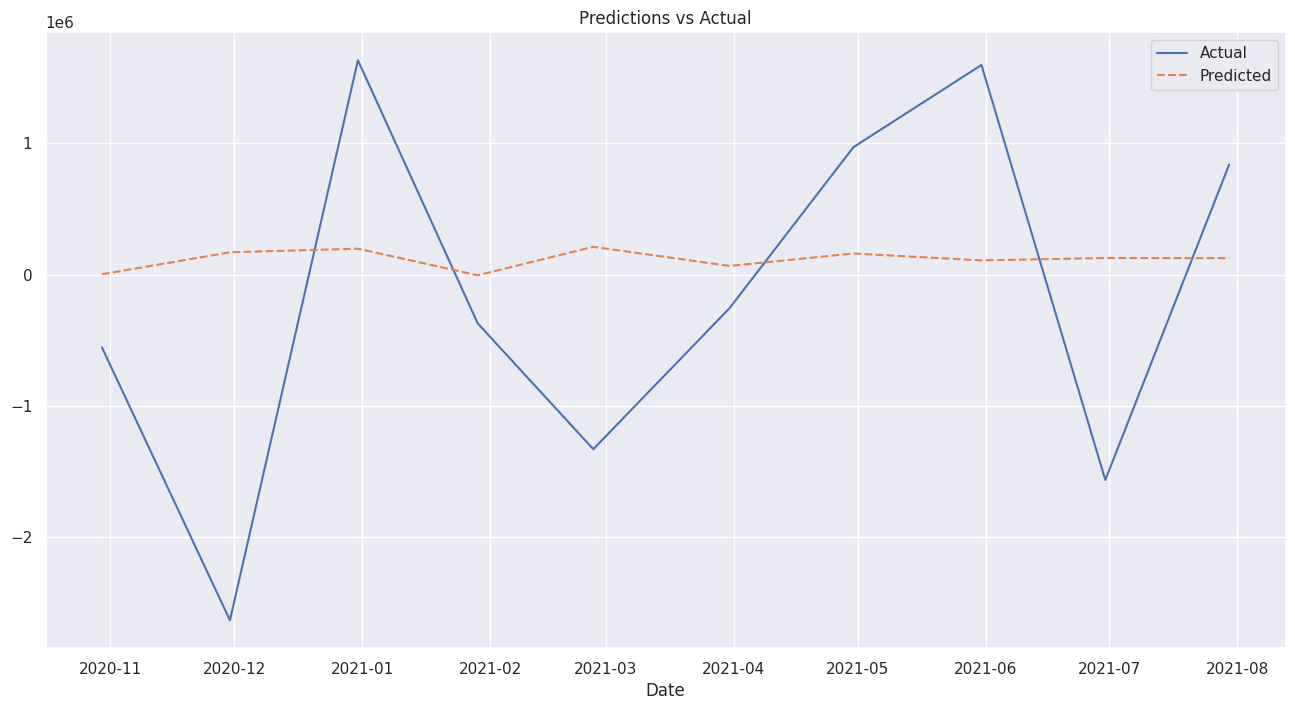

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#predictions
predictions = model_fit.predict()

#MSE
mse = mean_squared_error(df_diff['Indonesia(IDR)'][-len(predictions):], predictions)
print(mse)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(df_diff.index[-len(predictions):], df_diff['Indonesia(IDR)'][-len(predictions):], label='Actual')
plt.plot(df_diff.index[-len(predictions):], predictions, label='Predicted', linestyle='dashed')

plt.title('Predictions vs Actual')
plt.xlabel('Date')
plt.legend()

plt.show()

#Conclusion
Requiring multiple differences resulting in cutting off years of historical data to achieve stationarity illustrates that ARIMA is likely not the best model for gold price forecasting over long time spans.

shizuka © 2023